In [1]:
#Module 3
#Import the cv2 and matplotlib library and load the image.jpg into a numpy array.
#Import the KMeans model from sklearn, followed by clustering.
import cv2
from sklearn.cluster import KMeans
import webcolors
import glob
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread("image.jpg")

In [3]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [4]:
image = image.reshape(image.shape[0] * image.shape[1], image.shape[2])

In [5]:
image.shape

(618928, 3)

In [6]:
K = 4

In [7]:
clf = KMeans(n_clusters=K)

In [8]:
clf.fit(image)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [9]:
label = [0, 0, 0, 0]

In [10]:
for x in clf.labels_:
    label[x] += 1

In [11]:
label_sum = image.shape[0]
label = [float(x) / label_sum for x in label]

In [12]:
colors = [[int(value) for value in row] for row in clf.cluster_centers_]

In [15]:
clr = [webcolors.rgb_to_hex(c) for c in colors]

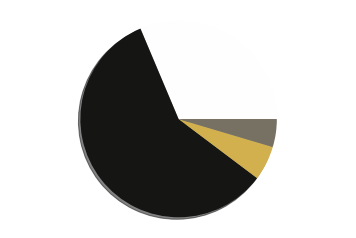

In [16]:
#Plot the most dominant colors on a pie chart.
plt.pie(label, colors=clr, shadow=True) 
plt.axis('equal')
plt.show()

In [17]:
#Write a for loop to import images 1-10 from the data set and plot the most common dominant colours found in different images vs percentages of each. 
images = []
files = glob.glob ("/home/jerry/Desktop/Colourify/Dominant_Color_Data_Set/*.jpg")
for myFile in files:
    image = cv2.imread (myFile)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    images.append (image)
    plt.figure()
    plt.axis("off")
    plt.imshow(image)

print('images shape:', np.array(images).shape)

images shape: (10, 640, 480, 3)


In [18]:
#Clustering
max_percentage = []
rgb_values = []
label = [0,0,0,0]
for i in range(len(images)):
    images[i] = images[i].reshape(images[i].shape[0] * images[i].shape[1], images[i].shape[2])
    clf = KMeans(n_clusters=K)
    clf.fit(images[i])
    for x in clf.labels_:
        label[x] += 1
    label_sum = images[i].shape[0]
    label = [float(x) / label_sum for x in label]
    m = max(label)
    ind = label.index(max(label))
    m = m*100
    max_percentage.append(m)
    colors = [[int(value) for value in row] for row in clf.cluster_centers_]
    rgb_values.append(colors[ind])

In [19]:
import matplotlib as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [20]:
print(max_percentage)
print(rgb_values)

[29.576171875, 41.90502641677856, 47.99516102074058, 67.02513129384681, 61.15581713909927, 58.458857929092254, 70.97252102492816, 46.36328742884109, 53.77547462170151, 56.552258383706445]
[[217, 212, 209], [137, 49, 55], [43, 43, 31], [252, 250, 248], [136, 130, 133], [251, 251, 251], [240, 240, 239], [241, 239, 241], [38, 37, 47], [42, 43, 62]]


In [22]:
#Finding colors name
def closest_colour(requested_colour):
    min_colours = {}
    for key, name in webcolors.css3_hex_to_names.items():
        r_c, g_c, b_c = webcolors.hex_to_rgb(key)
        rd = (r_c - requested_colour[0]) ** 2
        gd = (g_c - requested_colour[1]) ** 2
        bd = (b_c - requested_colour[2]) ** 2
        min_colours[(rd + gd + bd)] = name
    return min_colours[min(min_colours.keys())]

def get_colour_name(requested_colour):
    try:
        closest_name = actual_name = webcolors.rgb_to_name(requested_colour)
    except ValueError:
        closest_name = closest_colour(requested_colour)
        actual_name = None
    return actual_name, closest_name

#requested_colour = (119, 172, 152)
color_name = []
for i in rgb_values:
    actual_name, closest_name = get_colour_name(i)
    print("Actual colour name:", actual_name, ", closest colour name:", closest_name)
    color_name.append(closest_name)

Actual colour name: None , closest colour name: lightgrey
Actual colour name: None , closest colour name: brown
Actual colour name: None , closest colour name: darkslategrey
Actual colour name: None , closest colour name: snow
Actual colour name: None , closest colour name: grey
Actual colour name: None , closest colour name: snow
Actual colour name: None , closest colour name: whitesmoke
Actual colour name: None , closest colour name: whitesmoke
Actual colour name: None , closest colour name: darkslategrey
Actual colour name: None , closest colour name: darkslategrey


In [23]:
color_name 

['lightgrey',
 'brown',
 'darkslategrey',
 'snow',
 'grey',
 'snow',
 'whitesmoke',
 'whitesmoke',
 'darkslategrey',
 'darkslategrey']

In [24]:
max_percentage

[29.576171875,
 41.90502641677856,
 47.99516102074058,
 67.02513129384681,
 61.15581713909927,
 58.458857929092254,
 70.97252102492816,
 46.36328742884109,
 53.77547462170151,
 56.552258383706445]

In [31]:
list_of_tuple = list(zip(color_name,max_percentage))
list_of_list = [list(x) for x in list_of_tuple]

In [32]:
list_of_list

[['lightgrey', 29.576171875],
 ['brown', 41.90502641677856],
 ['darkslategrey', 47.99516102074058],
 ['snow', 67.02513129384681],
 ['grey', 61.15581713909927],
 ['snow', 58.458857929092254],
 ['whitesmoke', 70.97252102492816],
 ['whitesmoke', 46.36328742884109],
 ['darkslategrey', 53.77547462170151],
 ['darkslategrey', 56.552258383706445]]

In [35]:
#Average Percentage of the colors
m = 0;
avg_p = []
col = []
for i in list_of_list:
    c = 0
    avg = 0
    l = i[0]
    if l not in col:
        for j in list_of_list:
            if(l==j[0]):
                avg += j[1]
                c += 1
        m = avg/c
        print(m)
        avg_p.append(m)
        col.append(l)
    
print(col) 

29.576171875
41.90502641677856
52.77429800871619
62.741994611469536
61.15581713909927
58.66790422688462
['lightgrey', 'brown', 'darkslategrey', 'snow', 'grey', 'whitesmoke']


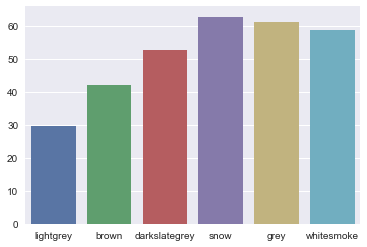

In [36]:
#Plotting Bar-graph
sns.barplot(col, avg_p)